In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [2]:
data = pd.read_csv("HRDataset_v14.csv")
#PRESENTATION DES DATAS
print(data.shape)
print(data.head(20))
print(data.columns)
print(data.isnull().sum())
print(data.info())

(311, 36)
               Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0        Adinolfi, Wilson  K  10026          0                0         1   
1   Ait Sidi, Karthikeyan     10084          1                1         1   
2          Akinkuolie, Sarah  10196          1                1         0   
3               Alagbe,Trina  10088          1                1         0   
4           Anderson, Carol   10069          0                2         0   
5          Anderson, Linda    10002          0                0         0   
6            Andreola, Colby  10194          0                0         0   
7                Athwal, Sam  10062          0                4         1   
8           Bachiochi, Linda  10114          0                0         0   
9         Bacong, Alejandro   10250          0                2         1   
10      Baczenski, Rachael    10252          1                1         0   
11           Barbara, Thomas  10242          1                1   

['Exceeds' 'Fully Meets' 'Needs Improvement' 'PIP']
PerformanceScore
Fully Meets          243
Exceeds               37
Needs Improvement     18
PIP                   13
Name: count, dtype: int64
PerformanceScore
Exceeds              10.486486
Fully Meets          10.222222
Needs Improvement    11.333333
PIP                   8.307692
Name: Absences, dtype: float64


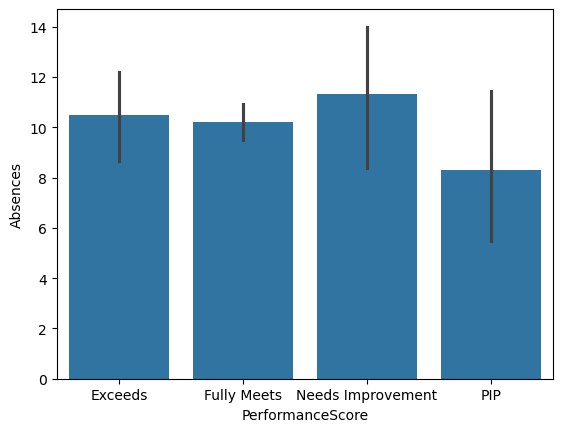

In [3]:
#REGROUPEMENT DES TRAVAILLEURS PAR PERFORMANCE
print(data['PerformanceScore'].unique())
print(data['PerformanceScore'].value_counts())
print(data.groupby('PerformanceScore')['Absences'].mean())
sns.barplot(data=data, x='PerformanceScore', y='Absences')
plt.show()

In [4]:
#PREMIERE IMPRESSION : LA PRÉSENCE AU TRAVAIL PERMET L'EFFICACITÉ ; HYPOTHESE SUR LE GROUPE PIP : EFFECTIF FAIBLE/TRES SURVEILLÉ
#QUI SONT LES OUTLIERS EN TERME D'ABSENCE
premierquantile = data['Absences'].quantile(0.25)
troisiemequantile = data['Absences'].quantile(0.75)
IQR = troisiemequantile - premierquantile
print(IQR)
outliersabsence = data[data['Absences'] > troisiemequantile + 1.5*IQR]
print(troisiemequantile + 1.5*IQR)
#PAS DE DEPASSEMENT DE CE TAUX
print(data['Absences'].max())
#PERSONNE AU DESSUS DE 30 ABSENCES; 20 MAXIMUM
print(data['Sex'].value_counts())
#PLUS DE FEMMES DANS L'ENTREPRISE 
# REPARTITION PAR GROUPE DE PERFORMANCE
print(data.groupby('PerformanceScore')['Sex'].value_counts())
#TEST CHI DEUX ENTRE SEXE ET GR DE PERF
print(data['GenderID'].value_counts())
tableaucroise=pd.crosstab(data['GenderID'], data['PerformanceScore'])
print(chi2_contingency(tableaucroise))
#PVALUE SUPERIEURE AU SEUIL; ON NE REJETTE PAS L'HYPOTHESE

10.0
30.0
20
Sex
F     176
M     135
Name: count, dtype: int64
PerformanceScore   Sex
Exceeds            F       20
                   M       17
Fully Meets        F      142
                   M      101
Needs Improvement  F        9
                   M        9
PIP                M        8
                   F        5
Name: count, dtype: int64
GenderID
0    176
1    135
Name: count, dtype: int64
Chi2ContingencyResult(statistic=2.4914019981664017, pvalue=0.47684693899616526, dof=3, expected_freq=array([[ 20.93890675, 137.51768489,  10.18649518,   7.35691318],
       [ 16.06109325, 105.48231511,   7.81350482,   5.64308682]]))
